# Lab Instructions

Choose your own adventure! In this lab, you will select a dataset, identify the target feature, and determine what relationships are present between the target and the other features in the data.

The dataset should have at least 5 features plus the target and at least a few hundred rows.  If the original dataset has more than 5 features, you may select the 5 that seem most interesting for this project. The subject can be anything you choose.  

For your lab submission, describe the dataset and the features - including all of the values of the features - and identify the target feature.  Then make visualizations to show the relationship of each feature to the target.  Which feature(s) seem most related?  Which features don't seem to influence the value of the target?  Draw at least one big picture conclusion about your data from the visualizations you've created.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('college_student_placement_dataset.csv')

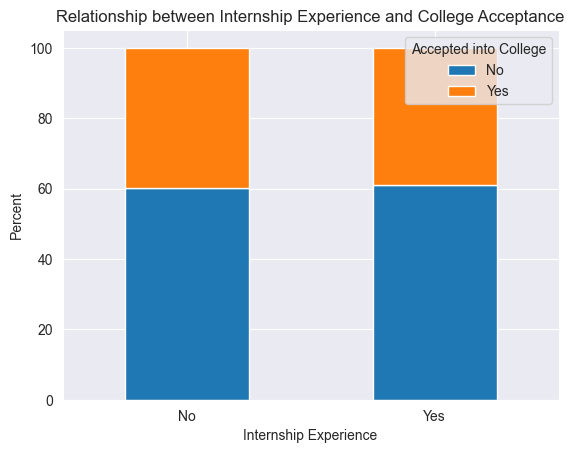

In [18]:
performance_placement_ct = pd.crosstab(df['Placement'], df['Internship_Experience'], normalize="index") * 100
performance_placement_ct.plot(kind='bar', stacked=True, xlabel = 'Internship Experience', ylabel= 'Percent', title='Relationship between Internship Experience and College Acceptance')
plt.xticks(rotation=0)
plt.legend(title='Accepted into College')
plt.show()

We can see that there is not a relationship between whether a college applicant has internship experience and whether they will get accepted.

In [4]:
# Based on the Weschler classification
df.loc[df['IQ'] >= 115, 'iq_group'] = 3 # Above average IQ ( >= 1σ)
df.loc[df['IQ'] < 115, 'iq_group'] = 2 # Average ( 1σ > iq > -1σ)
df.loc[df['IQ'] <= 85, 'iq_group'] = 1 # Below average IQ ( <= 1σ)

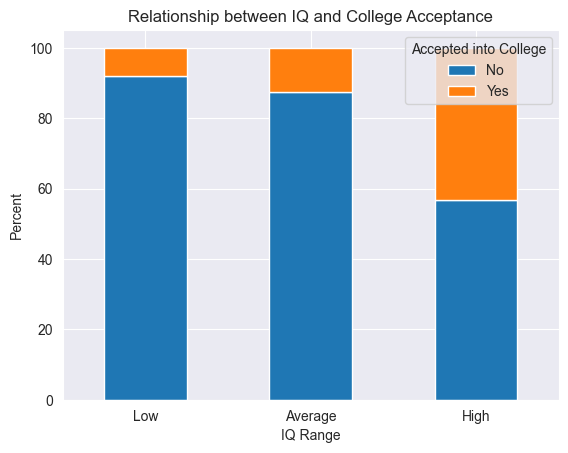

In [19]:
iqgroup_placement_ct = pd.crosstab(df['iq_group'], df['Placement'], normalize="index") * 100
iqgroup_placement_ct.plot(kind='bar', stacked=True, xlabel='IQ Range', ylabel='Percent', title='Relationship between IQ and College Acceptance')
plt.xticks([0,1,2], ['Low', 'Average', 'High'], rotation=0)
plt.legend(title='Accepted into College')
plt.show()

We can see that as the IQ range gets higher, the chances of getting into college increase. There seems to be a very strong relationship between IQ and getting into college.

In [6]:
df.loc[df['Communication_Skills'] >= 9, 'comm_group'] = 3   # Exceptional   (0, 9)
df.loc[df['Communication_Skills'] < 9, 'comm_group'] = 2    # Average       (8, 7, 6)
df.loc[df['Communication_Skills'] <= 6, 'comm_group'] = 1   # Below average (6, 5, 4)
df.loc[df['Communication_Skills'] <= 3, 'comm_group'] = 0   # Below average (3, 2, 1)


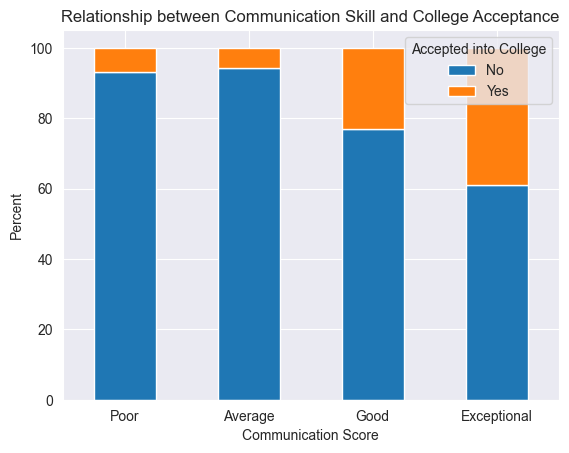

In [42]:
communication_placement_ct = pd.crosstab(df['comm_group'], df['Placement'], normalize="index") * 100
communication_placement_ct.plot(kind='bar', stacked=True, xlabel='Communication Score', ylabel='Percent', title='Relationship between Communication Skill and College Acceptance')
plt.xticks([0,1,2,3], ['Poor', 'Average', 'Good', 'Exceptional'], rotation=0)
plt.legend(title='Accepted into College')
plt.show()

We can see a positive relationship between communication scores and acceptance rates. It seems that the difference in odds of acceptance are relatively the same for a person with poor communication skills and a person with average communication skills, but if an applicant's communication skills are above average, the relationship is very strong.

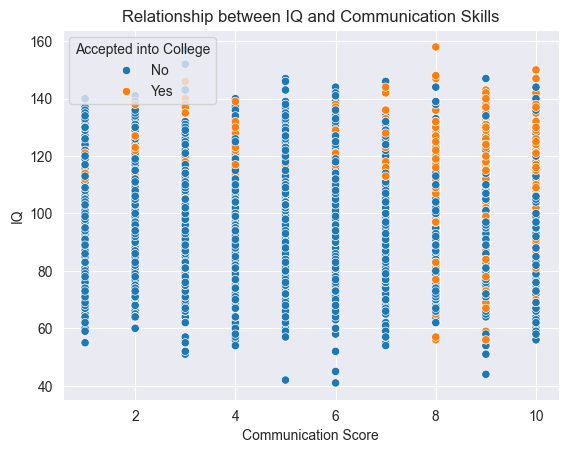

In [48]:
ax = sns.scatterplot(data=df, y='IQ', x='Communication_Skills', hue='Placement', )
ax.set_title('Relationship between IQ and Communication Skills')
plt.legend(title='Accepted into College', loc='upper left')# labels=['Yes', 'No'])

ax.set(xlabel='Communication Score')
plt.show();

This chart indicates an interesting divide. We see practically, 4 cases on this map here.

Below average IQ / Poor communication skills: Appears to be the least likely candidate for being accepted into a college.
Above Average IQ / Poor communication skills: Appears to have poor chances, but certainly higher than below avg. IQ and poor communication skills. Implying that a strong enough IQ may                                                         compensate for poor communication.
Below Average IQ / Good communication skills: Appears to have roughly the same chances as the above avg. but poor communication skills. Implying that good enough communication skills may                                                      compensate for low IQ.
Above Average IQ / Good communication skills: Appears to be the best candidate for being accepted. As one might imagine, having both of these desirable traits makes the candidate                                               desirable to the college.

(as a side-note: I think this would better be visualized with a bar chart with these four categories, but I wanted to have some variety here. Unfortunately, there is only one quantitative feature with good spread.)

In [9]:
df.loc[df['Extra_Curricular_Score'] >= 9, 'ec_group'] = 3   # Exceptional   (0, 9)
df.loc[df['Extra_Curricular_Score'] < 9, 'ec_group'] = 2    # Average       (8, 7, 6)
df.loc[df['Extra_Curricular_Score'] <= 6, 'ec_group'] = 1   # Below average (6, 5, 4)
df.loc[df['Extra_Curricular_Score'] <= 3, 'ec_group'] = 0   # Below average (3, 2, 1)

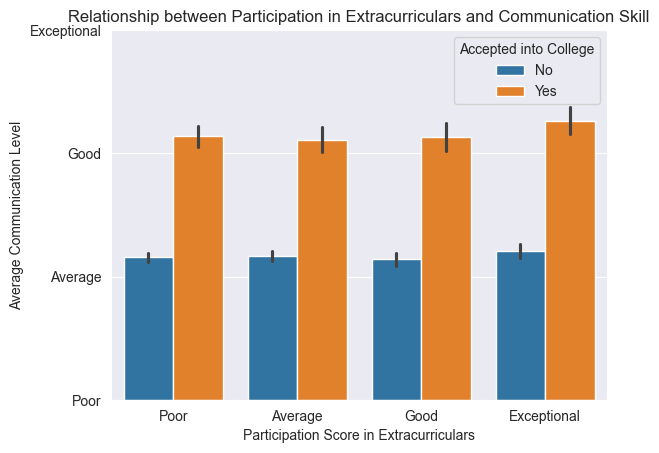

In [50]:
ax = sns.barplot(data=df, x='ec_group', hue='Placement', y='comm_group')
plt.yticks([0, 1, 2, 3], ['Poor', 'Average', 'Good', 'Exceptional'])
plt.xticks([0, 1, 2, 3], ['Poor', 'Average', 'Good', 'Exceptional'])
plt.legend(title='Accepted into College')#, labels=['Yes', 'No'])
ax.set(ylabel='Average Communication Level', xlabel='Participation Score in Extracurriculars', title='Relationship between Participation in Extracurriculars and Communication Skill')

plt.show()


Surprisingly, there does not seem to be much relation between participation in extracurriculars and average communication level. Except in the most extreme case of exceptional participation (and even there, there is a weak case to be made), it does not seem that participation in extracurriculars correlates to communication scores.

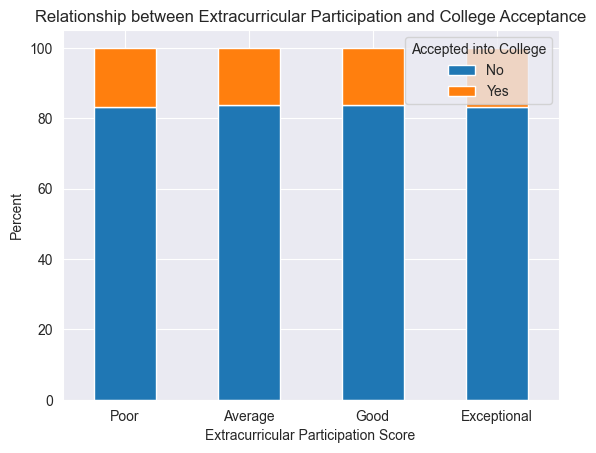

In [51]:
ec_placement_ct = pd.crosstab(df['ec_group'], df['Placement'], normalize="index") * 100
ec_placement_ct.plot(kind='bar', stacked=True, xlabel='Extracurricular Participation Score', ylabel='Percent', title='Relationship between Extracurricular Participation and College Acceptance')

plt.xticks([0,1,2,3], ['Poor', 'Average', 'Good', 'Exceptional'], rotation=0)
plt.legend(title='Accepted into College')
plt.show()

It seems that there is absolutely no relationship between how much a person participated in extracurriculars and how likely they were to get into college.

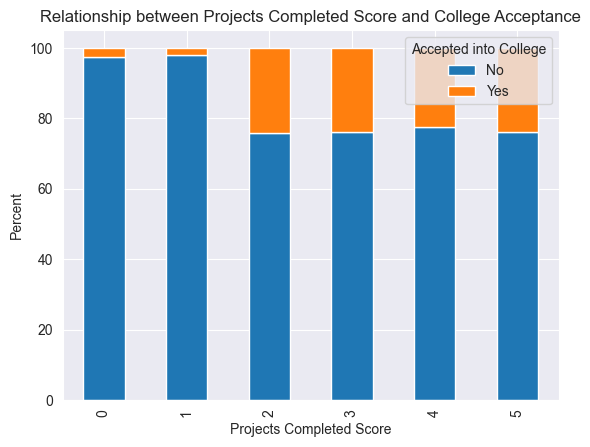

In [40]:
pc_ct = pd.crosstab(df['Projects_Completed'], df['Placement'], normalize='index') * 100
pc_ct.plot(kind='bar', stacked=True, xlabel='Projects Completed Score', ylabel='Percent', title='Relationship between Projects Completed Score and College Acceptance')
plt.legend(title='Accepted into College')
plt.show()

It seems that applicants are unlikely to be accepted if they have a project score of less than 3, but beyond that differences in acceptance rates appear to be negligible.

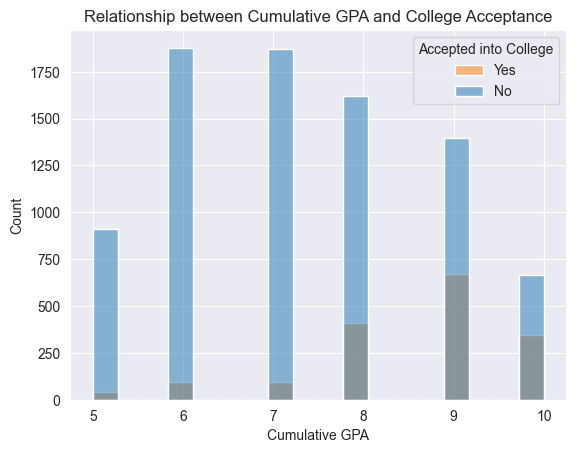

In [39]:
ax = sns.histplot(data=df, x=df['CGPA'].round(), hue='Placement')
ax.set(xlabel='Cumulative GPA')
ax.set_title('Relationship between Cumulative GPA and College Acceptance')
plt.legend(title='Accepted into College', labels=['Yes', 'No'])
plt.show()

This graph suggests a strong relationship between cumulative GPA and acceptance rates. We can see that the proportion of accepted students goes up as the cumulative GPA goes up.

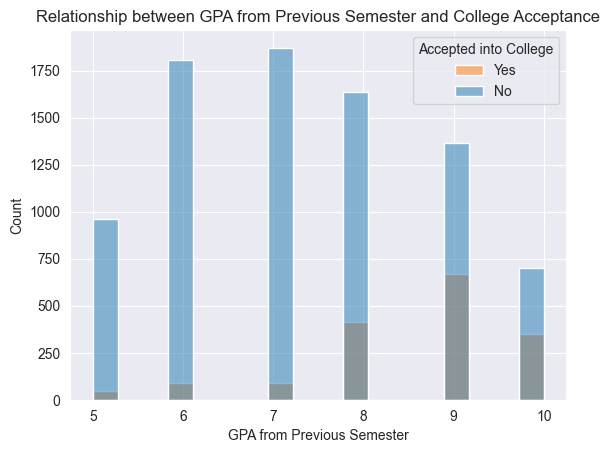

In [38]:
ax = sns.histplot(data=df, x=df['Prev_Sem_Result'].round(), hue='Placement', )
ax.set_title('Relationship between GPA from Previous Semester and College Acceptance')
ax.set(xlabel='GPA from Previous Semester')
plt.legend(title='Accepted into College', labels=['Yes', 'No'])
plt.show()

The relationship between the GPA from the previous semester and the rate of acceptance seems to be identical to the relationship between the cumulative GPA and the rate of acceptance. There is visually no difference in the data. The two values appear to be related.

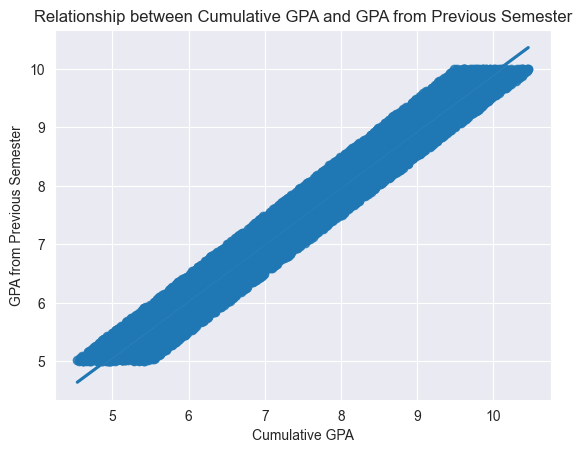

In [41]:
ax = sns.regplot(data=df, x='CGPA', y='Prev_Sem_Result')
ax.set(xlabel='Cumulative GPA', ylabel='GPA from Previous Semester')
ax.set_title('Relationship between Cumulative GPA and GPA from Previous Semester')
plt.show()

Confirming the earlier suspicion that cumulative GPA and the GPA from the semester, the values appear to map nearly 1:1 with no outliers. They values are very strongly related.

The target feature is 'Placement' (boolean)

After examining every relevant data from this dataset, I can confidently say that internship experience and extracurricular participation have no bearing on whether or not a student will be accepted. The number of projects completed appears to be conditionally related to acceptance rates with colleges rejecting most students who have a score of less than 3. The communication score, cumulative/previous semester GPA, and IQ appear to be good predictors for acceptance rates. We find that applicants with high IQs and good communication skills are highly likely to be accepted.

It seems that colleges most desire people who are good at communicating, have a high IQ, are experienced in working on projects, and had a good GPA before beginning applying.

